# Libraries


In [24]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read image with Simple ITK

In [22]:
image = sitk.ReadImage('c:/users/sven/Documents/BEP/simplified_data\B04\IMAGES\B04.nii.gz')
img_data = sitk.GetArrayFromImage(image)

mask = sitk.ReadImage('c:/users/sven/Documents/BEP/simplified_data\B04\MASKS\B04.nii.gz')
mask_data = sitk.GetArrayFromImage(mask)

# Generate slices

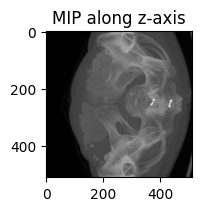

In [20]:


# Generate maximum intensity projections (MIPs) along the z-axis
z_mip = np.max(img_data, axis=2)



# Show the MIPs using matplotlib or other plotting libraries


plt.subplot(131)
plt.imshow(x_mip, cmap='gray')
plt.title('MIP along z-axis')


plt.show()

# Generate slice at constant z

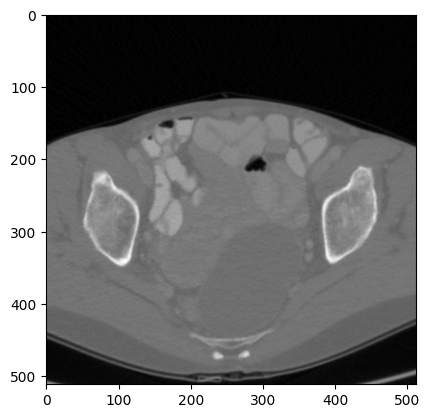

In [21]:
slice_z = img_data[33, :, :]
plt.imshow(slice_z, cmap='gray')

# Extract the tumor

In [34]:
#img = ((img_data+np.full((126, 512, 512), 1000))*mask_data)-np.full((126, 512, 512), 1000)
img = img_data*mask_data
img[img == 0] = -1000

# Create a SimpleITK image object from the numpy array
sitk_img = sitk.GetImageFromArray(img)

# Set the origin, spacing, and direction of the image (if needed)
sitk_img.SetOrigin((0, 0, 0))  # Set the origin to (0, 0, 0)
sitk_img.SetSpacing((1, 1, 1))  # Set the pixel spacing to (1, 1, 1)
sitk_img.SetDirection(np.identity(3).flatten())  # Set the image direction to identity

# Save the image in NIfTI format
sitk.WriteImage(sitk_img, 'image.nii.gz')

In [30]:
np.shape(img_data)

(126, 512, 512)